# My RDKit Cheatsheet

- toc: true 
- branch: master
- badges: true
- comments: true
- categories: [rdkit]
- image: images/rdkit_logo.png
- hide: false
- search_exclude: false

## Setup

The `RDKit` pacakge only supports `conda` installation.

```python
!conda install -c rdkit rdkit -y

```

Install Conda and RDKit in Google Colab:

```python
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -c rdkit rdkit -y 

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
```

## Basic

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

rdkit.__version__

'2020.03.1'

### Chem vs. AllChem

As mentioned in the [Getting Started](https://www.rdkit.org/docs/GettingStartedInPython.html#chem-vs-allchem):

> The majority of “basic” chemical functionality (e.g. reading/writing molecules, substructure searching, molecular cleanup, etc.) is in the `rdkit.Chem` module. More advanced, or less frequently used, functionality is in `rdkit.Chem.AllChem`. 

> If you find the Chem/AllChem thing annoying or confusing, you can use python’s “import … as …” syntax to remove the irritation:


   ```python
    from rdkit.Chem import AllChem as Chem
   ```

Get a `RDKit molecule` from SMILES. `RDKit molecule` enable several features to handle molecules: drawing, computing fingerprints/properties, molecular curation etc.

In [2]:
smiles = 'COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O'
mol = Chem.MolFromSmiles(smiles)
print(mol)

The RDKit molecules can be directly printed in jupyter enviroment.

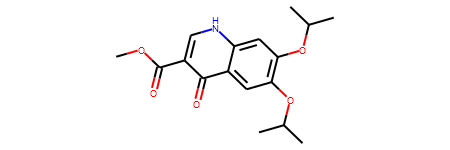

In [3]:
mol

Convert a RDKit molecule to SMILES.

In [4]:
smi = Chem.MolToSmiles(mol)
smi

'COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O'

Convert a RDKit molecule to InchiKey.

In [5]:
Chem.MolToInchiKey(mol)

'VSIUFPQOEIKNCY-UHFFFAOYSA-N'

Convert a RDKit molecule to coordinative representation (which can be stored in `.sdf` file).

In [6]:
#collapse_output
mol_block = Chem.MolToMolBlock(mol)
print(mol_block)


     RDKit          2D

 23 24  0  0  0  0  0  0  0  0999 V2000
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500   -1.2990    0

### SMILES Canonicalization

In [7]:
Chem.MolToSmiles(Chem.MolFromSmiles(smi))

'COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O'

### Reading sets of molecules

Major types of molecular file formats:
1. `.csv` file that includes a column of `SMILES`. See `PandasTools` section.
2. `.smi/.txt` file that includes `SMILES`. Collect the SMILES as a list. The following code is an example to read a `.smi` file that contains one SMILES per line.

```python
file_name = 'somedata.smi'

with open(file_name, "r") as ins:
    smiles = []
    for line in ins:
        smiles.append(line.split('\n')[0])
print('# of SMILES:', len(smiles))
```
3. `.sdf` file that includes `atom coordinates`. Reading molecules from `.sdf` file. [Code Example](https://www.rdkit.org/docs/GettingStartedInPython.html#reading-sets-of-molecules)

### Draw molecules in Jupter environment

Print molecules in grid.

In [8]:
smiles = [
    'N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c1ccccc1',
    'c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21',
    'C=C(C)C1Cc2c(ccc3c2OC2COc4cc(OC)c(OC)cc4C2C3=O)O1',
    'ClC(Cl)=C(c1ccc(Cl)cc1)c1ccc(Cl)cc1'
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]

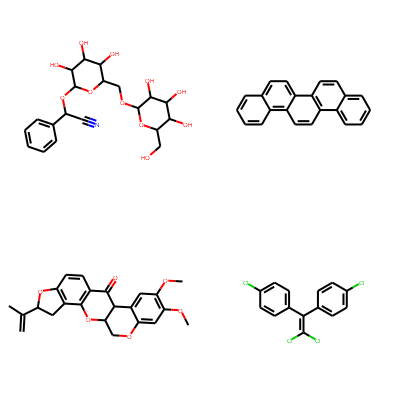

In [9]:
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

### Disable Error Message

In [10]:
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*')    

## PandasTools

`PandasTools` enables using RDKit molecules as columns of a `Pandas Dataframe`. 

In [11]:
import pandas as pd
from rdkit.Chem import PandasTools

In [12]:
url = 'https://raw.githubusercontent.com/XinhaoLi74/molds/master/clean_data/ESOL.csv'

esol_data = pd.read_csv(url)
esol_data.head(1)

,smiles,logSolubility
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77


Add `ROMol` to Pandas Dataframe.

,smiles,logSolubility,ROMol
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77,

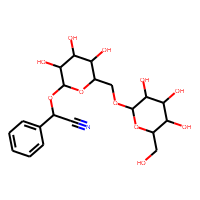

In [13]:
PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='smiles')
esol_data.head(1)

`ROMol` column stores `rdchem.Mol` object.

In [14]:
print(type(esol_data.ROMol[0]))

<class 'rdkit.Chem.rdchem.Mol'>


Draw the structures in grid.

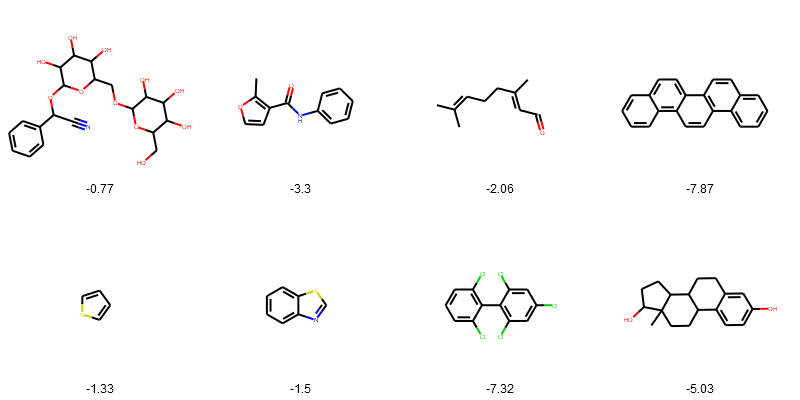

In [15]:
PandasTools.FrameToGridImage(esol_data.head(8), legendsCol="logSolubility", molsPerRow=4)

Adding new columns of properites use `Pandas` [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) method.

,smiles,logSolubility,ROMol,n_Atoms
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77,,32

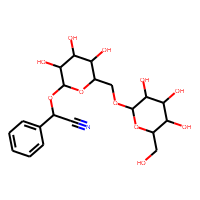

In [16]:
esol_data["n_Atoms"] = esol_data['ROMol'].map(lambda x: x.GetNumAtoms())
esol_data.head(1)

Before saving the dataframe as csv file, it is recommanded to drop the `ROMol` column.

In [17]:
esol_data = esol_data.drop(['ROMol'], axis=1)
esol_data.head(1)

,smiles,logSolubility,n_Atoms
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77,32


## Descriptors/Fingerprints

The RDKit has a variety of built-in functionality for generating molecular fingerprints/descriptors. A detialed description can be found [here](https://www.rdkit.org/docs/RDKit_Book.html#additional-information-about-the-fingerprints). 

,smiles,logSolubility,ROMol
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77,

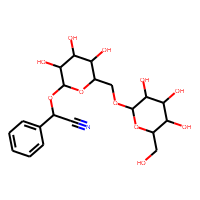

In [18]:
url = 'https://raw.githubusercontent.com/XinhaoLi74/molds/master/clean_data/ESOL.csv'

esol_data = pd.read_csv(url)
PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='smiles')
esol_data.head(1)

### Morgan Fingerprint (ECFPx)

`AllChem.GetMorganFingerprintAsBitVect` Parameters:
1. `radius`: no default value, usually set 2 for similarity search and 3 for machine learning.
2. `nBits`: number of bits, default is 2048. 1024 is also widely used.
3. [other parameterss](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html) are ususlly left to default

More examples can be found in this [notebook](https://github.com/XinhaoLi74/Hierarchical-QSAR-Modeling/blob/master/notebooks/descriptors.ipynb) from my previous work.

In [19]:
radius=3
nBits=1024

ECFP6 = [AllChem.GetMorganFingerprintAsBitVect(x,radius=radius, nBits=nBits) for x in esol_data['ROMol']]

In [20]:
ECFP6[0]

ECFP6 fingerprint for each molecule has 1024 bits.

In [21]:
len(ECFP6[0])

1024

Save as a `.csv` file for futher use (e.g., machine learning). I usually save (1) SMILES as index and (2) each bit as a column to the csv file. 

In [22]:
#collapse_output
ecfp6_name = [f'Bit_{i}' for i in range(nBits)]
ecfp6_bits = [list(l) for l in ECFP6]
df_morgan = pd.DataFrame(ecfp6_bits, index = esol_data.smiles, columns=ecfp6_name)
df_morgan.head(1)

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
smiles,,,,,,,,,,,,,,,,,,,,,
N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c1ccccc1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Similarity Search

Compute the similarity of a reference molecule and a list of molecules. Here is an example of using ECFP4 fingerprint to compute the `Tanimoto Similarity` (the default metric of [DataStructs.FingerprintSimilarity](https://www.rdkit.org/docs/source/rdkit.DataStructs.html).


1. compute fingerprints

In [23]:
ref_smiles = 'COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O'
ref_mol = Chem.MolFromSmiles(ref_smiles)
ref_ECFP4_fps = AllChem.GetMorganFingerprintAsBitVect(ref_mol,2)

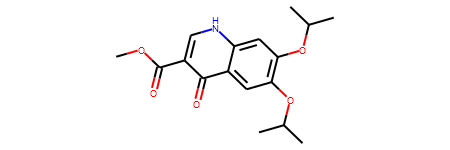

In [24]:
ref_mol

In [25]:
bulk_ECFP4_fps = [AllChem.GetMorganFingerprintAsBitVect(x,2) for x in esol_data['ROMol']]

In [26]:
from rdkit import DataStructs

similarity_efcp4 = [DataStructs.FingerprintSimilarity(ref_ECFP4_fps,x) for x in bulk_ECFP4_fps]

We can also add the `similarity_efcp4` to the dataframe and visualize the structure and similarity.

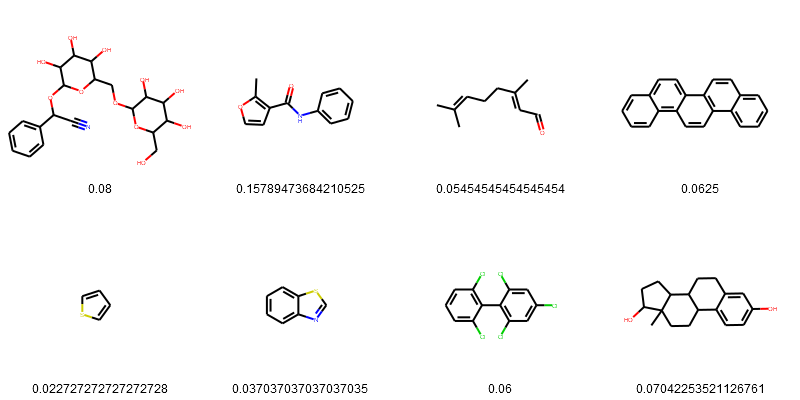

In [27]:
esol_data['Tanimoto_Similarity (ECFP4)'] = similarity_efcp4
PandasTools.FrameToGridImage(esol_data.head(8), legendsCol="Tanimoto_Similarity (ECFP4)", molsPerRow=4)

Sort the result from highest to lowest.

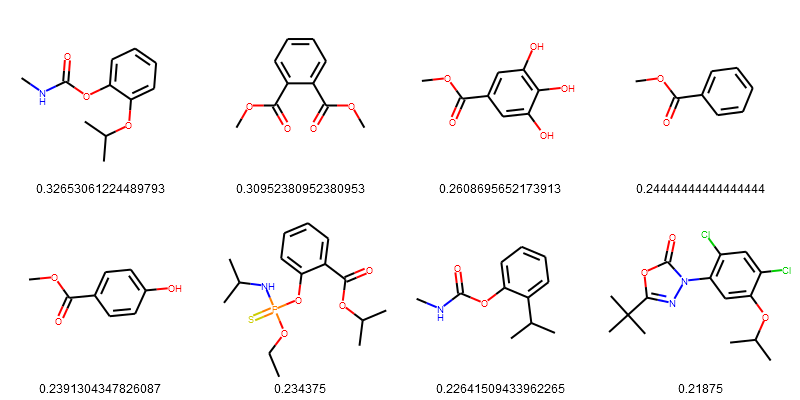

In [28]:
esol_data = esol_data.sort_values(['Tanimoto_Similarity (ECFP4)'], ascending=False)
PandasTools.FrameToGridImage(esol_data.head(8), legendsCol="Tanimoto_Similarity (ECFP4)", molsPerRow=4)

## More Reading

1. [Offical documentation](https://www.rdkit.org/docs/).
2. [Getting Started with the RDKit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html)
3. [The RDKit Book](https://www.rdkit.org/docs/RDKit_Book.html)
4. [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html)
> This document provides example recipes of how to carry out particular tasks using the RDKit functionality from Python. The contents have been contributed by the RDKit community, tested with the latest RDKit release, and then compiled into this document.